In [1]:
## 確認硬體資源
!nvidia-smi

Mon Mar 25 04:32:50 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 415.27       Driver Version: 415.27       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   38C    P8     1W / 175W |    131MiB /  7952MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.9429 - acc: 0.2990 - val_loss: 1.7811 - val_acc: 0.3565
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.7014 - acc: 0.3921 - val_loss: 1.6477 - val_acc: 0.4107
Epoch 3/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.6154 - acc: 0.4236 - val_loss: 1.6140 - val_acc: 0.4309
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5560 - acc: 0.4422 - val_loss: 1.5392 - val_acc: 0.4501
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.5103 - acc: 0.4624 - val_loss: 1.5156 - val_acc: 0.4582
Epoch 6/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.4658 - acc: 0.4746 - val_loss: 1.4997 - val_acc: 0.4601
Epoch 7/100
50000/50000 [==============================] - 2s 42us/step -

Epoch 58/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5472 - acc: 0.8050 - val_loss: 1.9479 - val_acc: 0.5171
Epoch 59/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5460 - acc: 0.8054 - val_loss: 1.9994 - val_acc: 0.5194
Epoch 60/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5463 - acc: 0.8028 - val_loss: 1.9778 - val_acc: 0.5073
Epoch 61/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5450 - acc: 0.8048 - val_loss: 1.9797 - val_acc: 0.5179
Epoch 62/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5253 - acc: 0.8114 - val_loss: 2.0212 - val_acc: 0.5111
Epoch 63/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.5055 - acc: 0.8192 - val_loss: 2.0917 - val_acc: 0.5121
Epoch 64/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.4991 - acc: 0.8213 - val_loss: 2.0909 - val_acc: 0.5170
Epoch 65/100
50000/50000 [=

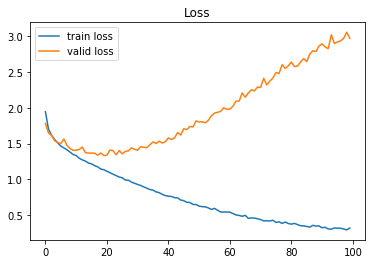

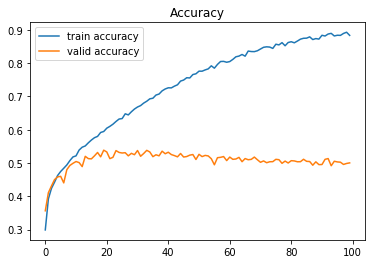

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度